<a href="https://colab.research.google.com/github/AYA-NASH/NN_with_TensorFlow/blob/main/8_Introduction_to_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Dowmnloading helper functions

In [ ]:
# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-03-29 23:03:13--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-03-29 23:03:13 (62.0 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# Import series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

####Getting the dataset:

In [ ]:
# Check for GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-c59724a2-7786-1f15-7f15-706a086002f7)


In [ ]:
# Download data (same as from Kaggle)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Unzip data
unzip_data("nlp_getting_started.zip")

--2023-03-29 23:03:18--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.201.128, 74.125.202.128, 74.125.69.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.201.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.006s  

2023-03-29 23:03:18 (103 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



####Visualizing the text dataset

In [ ]:
import pandas as pd

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [ ]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
# shuffling dataset:
train_shuffled = train_df.sample(frac = 1, random_state = 42)
test_shuffled = test_df.sample(frac = 1, random_state = 42)

In [ ]:
train_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
# the number of examples of each class
# 1 = a real disaster Tweet
# 0 = not a real disaster Tweet
train_shuffled.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
# the total number of samples
print(f"Total training samples: {len(train_df)}")
print(f"Total test samples: {len(test_df)}")
print(f"Total samples: {len(train_df) + len(test_df)}")


Total training samples: 7613
Total test samples: 3263
Total samples: 10876


**Visualizing random Examples**

In [ ]:
import random

random_index = random.randint(0, len(train_shuffled)-5)

for row in train_shuffled[["text","target"]][random_index: random_index + 5].itertuples():
  _, text, target = row
  print(f"Target : {target}","(is a disaster)" if (target > 0) else "(Not a disaster)")
  print(f"Text:\n{text}")
  print("\n----------")

Target : 1 (is a disaster)
Text:
@Jenniferarri_ comeeeee! ...but why is it bout to storm tho

----------
Target : 0 (Not a disaster)
Text:
Phones Offers &gt;&gt; http://t.co/bYtbZ8s5ux #034 8-Pin Lightning Connector 2.1A Car Charger For Apple 5 5S 5C 6 6+ iPÛ_ http://t.co/o3wVScLiCX

----------
Target : 0 (Not a disaster)
Text:
So I had my phone charging and lightening struck in my backyard and I was holding my phone and it electrocuted my hand???? hurts so bad man??

----------
Target : 0 (Not a disaster)
Text:
AMBULANCE SPRINTER AUTOMATIC FRONTLINE VEHICLE CHOICE OF 14 LEZ COMPLIANT | eBay http://t.co/4evTTqPEia

----------
Target : 1 (is a disaster)
Text:
#MakeWaterWork Okanagan! Drought rating maxed out - Okanagan Valley http://t.co/tXrBdaUBNN http://t.co/Ue78c7EgOX #WesternCanadaDrought

----------


**Split Training data to train and dev sets :**

In [ ]:
train_shuffled["text"]

2644    So you have a new weapon that can cause un-ima...
2227    The f$&amp;@ing things I do for #GISHWHES Just...
5448    DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...
132     Aftershock back to school kick off was great. ...
6845    in response to trauma Children of Addicts deve...
                              ...                        
5226    @Eganator2000 There aren't many Obliteration s...
5390    just had a panic attack bc I don't have enough...
860     Omron HEM-712C Automatic Blood Pressure Monito...
7603    Officials say a quarantine is in place at an A...
7270    I moved to England five years ago today. What ...
Name: text, Length: 7613, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_shuffled["text"].to_numpy(),
                                                                            train_shuffled["target"].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42)

In [ ]:
train_sentences.shape , train_labels

((6851,), array([0, 0, 1, ..., 1, 1, 0]))

In [ ]:
val_sentences.shape

(762,)

####Converting text into numbers:

In [ ]:
# the average of the number of words in tweets
# i is the i_th tweet of our training data
# i.split(): returns the tweet as a list of words

max_length = round(sum([len(i.split()) for i in  train_sentences])/len(train_sentences))

max_vocab_length = 10000

In [ ]:
from tensorflow.keras.layers import TextVectorization

text_tokenizer = TextVectorization(max_tokens = max_vocab_length,
                                    standardize='lower_and_strip_punctuation',
                                    split='whitespace',
                                    ngrams=None, # token-single word
                                    output_mode='int', # convert to int
                                    output_sequence_length=max_length)

In [ ]:
text_tokenizer.adapt(train_sentences)

In [ ]:
x = train_sentences[0]
x

'@mogacola @zamtriossu i screamed after hitting tweet'

In [ ]:
text_tokenizer([x])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[   1, 6507,    8,  387,   43, 2956,  978,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [ ]:
random_sentence = random.choice(train_sentences)
print(f"The original Sentence :\n {random_sentence} \n\nThe vectorized version of the sentence:\n {text_tokenizer([random_sentence])}")

The original Sentence :
 Jack Wilshere has poor injury recordand his off field behaviors doesn't help.#Arsenal 

The vectorized version of the sentence:
 [[2078 4246   41  879  345 9285   79  102 2458    1  629    1    0    0
     0]]


In [ ]:
 vocabulary = text_tokenizer.get_vocabulary()

 len(vocabulary) , vocabulary[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

####Creating Embeddings

In [ ]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim= max_vocab_length, # the length of the vocabulary vector
                      output_dim = 128,
                      input_length = max_length, #the length of the input length
                      name="embedding_1")

In [ ]:
embedding

In [ ]:
random_sentence

"Jack Wilshere has poor injury recordand his off field behaviors doesn't help.#Arsenal"

In [ ]:
print(f"The original sentence:\n{random_sentence}\n\nThe Embedded Representation:")

# passing the sentence to the embedding sentence in numeric form(i.e.the indexes)
embedded_sentence = embedding(text_tokenizer([random_sentence]))

embedded_sentence

The original sentence:
Jack Wilshere has poor injury recordand his off field behaviors doesn't help.#Arsenal

The Embedded Representation:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.00651932, -0.01426605, -0.02119602, ..., -0.01559726,
          0.02372767,  0.02662173],
        [ 0.00294716, -0.02016475,  0.04065834, ..., -0.02537458,
         -0.03749688,  0.01622058],
        [-0.04202811, -0.04481859,  0.03768593, ...,  0.02554378,
          0.0275646 ,  0.0047291 ],
        ...,
        [-0.0201807 , -0.02951233, -0.01137476, ...,  0.02698136,
         -0.04186307,  0.03317961],
        [-0.0201807 , -0.02951233, -0.01137476, ...,  0.02698136,
         -0.04186307,  0.03317961],
        [-0.0201807 , -0.02951233, -0.01137476, ...,  0.02698136,
         -0.04186307,  0.03317961]]], dtype=float32)>

In [ ]:
print(random_sentence[0])
print(embedded_sentence[0][0])

J
tf.Tensor(
[-0.00651932 -0.01426605 -0.02119602  0.01094051  0.02700372 -0.02798945
 -0.03086435  0.00742846 -0.02860789  0.03779982 -0.01003858 -0.03776331
 -0.03207017 -0.00011318 -0.03730613  0.0259169  -0.02519972  0.03570615
  0.0428234   0.00149582 -0.00294606 -0.0045738   0.04682063  0.04823703
 -0.01992993  0.00134658  0.02868041 -0.02203965  0.02121675 -0.04970961
  0.03267967  0.02645901 -0.00205277 -0.01588339 -0.04965817 -0.00247915
 -0.00521934 -0.03470842  0.01722293 -0.01642     0.02668828 -0.03076079
  0.01780147 -0.0118829   0.03592776  0.00991859  0.01806977  0.01531643
 -0.01346077 -0.03110319 -0.0045552   0.02687105 -0.01866336 -0.03468974
  0.01584032  0.04894069 -0.01588487 -0.00490955 -0.03569007  0.03491218
 -0.03486463  0.03094753 -0.03040924 -0.03839414 -0.00771698 -0.00064446
  0.0065316   0.02615852 -0.02321449  0.03477051 -0.03222343 -0.04448307
  0.04904311 -0.01934186  0.0074092  -0.01913487 -0.04752302 -0.03782623
  0.0336636   0.04676993 -0.02497716 -

###Modeling a text dataset

####Model 0: baseline

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline(
    [
        ("tfidf", TfidfVectorizer()),
        ("clf", MultinomialNB()),
    ]
)

In [ ]:
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# Evaluating the baseline model:
baseline_score = model_0.score(val_sentences, val_labels)

print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [ ]:
# Making predictions:
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]


array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
val_labels[:20]

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

**Creating an evaluation function for our model experiments**

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def calculate_results(true_labels, predicted_labels):
  model_accuracy = accuracy_score(true_labels, predicted_labels)
  precision, recall, f_score, _ = precision_recall_fscore_support(true_labels,
                                                                  predicted_labels,
                                                                  average = 'weighted')
  model_results = {"accuracy": model_accuracy*100,
             "precision": precision,
             "recall": recall,
             "f_score": f_score
  }

  return model_results

In [ ]:
baseline_results = calculate_results(val_labels, baseline_preds)

baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f_score': 0.7862189758049549}

####Model1:Feedforward network

In [ ]:
# creating a tensorboard
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [ ]:
from tensorflow.keras import layers
import tensorflow as tf

inputs = layers.Input(shape=(1,), dtype= "string")
# converting the string into tokens (passing the inputs to the text vectorizer)
x = text_tokenizer(inputs)
# turn tokens into embeddings
x = embedding(x)
# condense the feature vector for each token to one vector
x = layers.GlobalAveragePooling1D()(x)
# the output layer (single output unit since it is a binary classification problem)
output = layers.Dense(1, activation = "sigmoid")(x)

# combine inputs and outputs
model_1 = tf.keras.Model(inputs, output, name = "model_1_dense")

In [ ]:
model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
history_1 = model_1.fit(x=train_sentences,
                        y=train_labels,
                        validation_data = (val_sentences, val_labels),
                        epochs = 5,
                        callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                              experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20230329-230328
Epoch 1/5
215/215 [==============================] - 24s 82ms/step - loss: 0.6130 - accuracy: 0.6828 - val_loss: 0.5346 - val_accuracy: 0.7677
Epoch 2/5
215/215 [==============================] - 3s 16ms/step - loss: 0.4418 - accuracy: 0.8189 - val_loss: 0.4680 - val_accuracy: 0.7874
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3475 - accuracy: 0.8606 - val_loss: 0.4558 - val_accuracy: 0.7927
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2850 - accuracy: 0.8894 - val_loss: 0.4672 - val_accuracy: 0.7953
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.2377 - accuracy: 0.9134 - val_loss: 0.4809 - val_accuracy: 0.7887


In [ ]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4809 - accuracy: 0.7887


[0.48093271255493164, 0.7887139320373535]

In [ ]:
# making predictions:
model1_pred_probs = model_1.predict(val_sentences)

24/24 [==============================] - 0s 2ms/step


In [ ]:
model1_pred_probs[:10]

array([[0.3595142 ],
       [0.8047257 ],
       [0.9978769 ],
       [0.09558089],
       [0.10489235],
       [0.9253374 ],
       [0.91404104],
       [0.99292153],
       [0.9603367 ],
       [0.23078245]], dtype=float32)

In [ ]:
model1_pred_probs.shape

(762, 1)

In [ ]:
# squeeze the model predictions and round it so it can be compared with the true labels
model1_preds = tf.squeeze(tf.round(model1_pred_probs))

In [ ]:
model1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Evaluating the model with different evaluation metrics
model_1_results = calculate_results(val_labels, model1_preds)

In [ ]:
model_1_results

{'accuracy': 78.87139107611549,
 'precision': 0.7953441303708004,
 'recall': 0.7887139107611548,
 'f_score': 0.7852145092095362}

In [ ]:
import numpy as np

np.array(list(model_1_results.values())) > np.array(list(baseline_results.values())) 

array([False, False, False, False])

####Visualizing the learned Embedding

The embeddings are weights of the Embedding layer in the model. The weights matrix is of shape (vocab_size, embedding_dimension)




In [ ]:
word_weights = model_1.get_layer("embedding_1").get_weights()[0]

In [ ]:
word_weights.shape

(10000, 128)

In [ ]:
vocabulary[:10]

['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is']

In [ ]:
# uploading embedding matrix and its metadata to tsv files to be visualize them using the "Tensorflow Projector" tool
import io

out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

# each word in the vocabulary has an embedding vector
# writing vectors to the files
for index, word in enumerate(vocabulary):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = word_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
  
out_v.close()
out_m.close()

In [ ]:
# to download these files to the local machine
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

####Model_2: LSTM

In [ ]:
from tensorflow.keras import layers

inputs =  layers.Input(shape=(1,), dtype= "string")
# tokenize the input stream
x = text_tokenizer(inputs)
# converting into embeddings
x = embedding(x)
print(x.shape)
# passing vectors to the LSTM layer
# x = layers.LSTM(64, return_sequences = True)(x)
# print(x.shape)
# x = layers.LSTM(64, return_sequences = True)(x)
# print(x.shape)
x = layers.LSTM(64)(x)
print(x.shape)
outputs = layers.Dense(1, activation = "sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name = "model_2_LSTM")

(None, 15, 128)
(None, 64)


In [ ]:
model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
history_2 = model_2.fit(x=train_sentences,
                        y=train_labels,
                        validation_data = (val_sentences, val_labels),
                        epochs = 5,
                        callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                  experiment_name="LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20230329-230412
Epoch 1/5
215/215 [==============================] - 13s 42ms/step - loss: 0.2214 - accuracy: 0.9250 - val_loss: 0.5385 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 3s 11ms/step - loss: 0.1567 - accuracy: 0.9421 - val_loss: 0.5532 - val_accuracy: 0.7782
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.1295 - accuracy: 0.9508 - val_loss: 0.6636 - val_accuracy: 0.7822
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1060 - accuracy: 0.9606 - val_loss: 0.8504 - val_accuracy: 0.7822
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0845 - accuracy: 0.9638 - val_loss: 0.7987 - val_accuracy: 0.7690


In [ ]:
# evaluate the model
model_2.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 4ms/step - loss: 0.7987 - accuracy: 0.7690


[0.7987253665924072, 0.7690288424491882]

In [ ]:
model_2_pred_probs = model_2.predict(val_sentences)

model_2_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[0.06084887],
       [0.8432094 ],
       [0.99984896],
       [0.12005363],
       [0.00245235],
       [0.99969316],
       [0.9580419 ],
       [0.9998946 ],
       [0.9998399 ],
       [0.33125144]], dtype=float32)

In [ ]:
model2_preds = tf.squeeze(tf.round(model_2_pred_probs))

In [ ]:
# evaluating the model using different metrics
model_2_results = calculate_results(val_labels, model2_preds)

model_2_results

{'accuracy': 76.9028871391076,
 'precision': 0.7703609632684677,
 'recall': 0.7690288713910761,
 'f_score': 0.7670626202962317}

In [ ]:
import numpy as np

np.array(list(model_2_results.values())) > np.array(list(baseline_results.values())) 

array([False, False, False, False])

####Model_3: GRU

In [ ]:
from tensorflow.keras import layers

inputs =  layers.Input(shape=(1,), dtype= "string")
# tokenize the input stream
x = text_tokenizer(inputs)
# converting into embeddings
x = embedding(x)
print(x.shape)
# x = layers.GRU(64, return_sequences = True)(x)
# print(x.shape)
x = layers.GRU(64)(x)
print(x.shape)
outputs = layers.Dense(1, activation = "sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name = "model_3_GRU")

(None, 15, 128)
(None, 64)


In [ ]:
model_3.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
history_3 = model_3.fit(x=train_sentences,
                        y=train_labels,
                        validation_data = (val_sentences, val_labels),
                        epochs = 5,
                        callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                      experiment_name="GRU")])

Saving TensorBoard log files to: model_logs/GRU/20230329-230436
Epoch 1/5
215/215 [==============================] - 11s 41ms/step - loss: 0.1692 - accuracy: 0.9260 - val_loss: 0.6978 - val_accuracy: 0.7769
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0839 - accuracy: 0.9685 - val_loss: 0.8875 - val_accuracy: 0.7795
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0716 - accuracy: 0.9721 - val_loss: 0.9385 - val_accuracy: 0.7795
Epoch 4/5
215/215 [==============================] - 4s 17ms/step - loss: 0.0616 - accuracy: 0.9747 - val_loss: 1.0743 - val_accuracy: 0.7690
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0540 - accuracy: 0.9752 - val_loss: 1.2980 - val_accuracy: 0.7743


In [ ]:
# evaluate the model
model_3.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 4ms/step - loss: 1.2980 - accuracy: 0.7743


[1.298042893409729, 0.7742782235145569]

In [ ]:
model_3_pred_probs = model_3.predict(val_sentences)
model3_preds = tf.squeeze(tf.round(model_3_pred_probs))

# evaluating the model using different metrics
model_3_results = calculate_results(val_labels, model3_preds)

model_3_results
# model_3_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


{'accuracy': 77.42782152230971,
 'precision': 0.7808800469989561,
 'recall': 0.7742782152230971,
 'f_score': 0.7702846759539673}

####Model_4: Bidirectional RNN

In [ ]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype= "string")
# tokenize the input stream
x = text_tokenizer(inputs)
# converting into embeddings
x = embedding(x)

# forward_layer = layers.LSTM(64)
# backward_layer = layers.LSTM(64, activation='relu',
#                       go_backwards=True)

# x = layers.Bidirectional(forward_layer, backward_layer=backward_layer)(x)

x = layers.Bidirectional(layers.LSTM(64))(x)

outputs = layers.Dense(1, activation = "sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name = "model_4_Bidirectional")



In [ ]:
model_4.summary()

Model: "model_4_Bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

In [ ]:
model_4.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
history_4 = model_4.fit(x=train_sentences,
                        y=train_labels,
                        validation_data = (val_sentences, val_labels),
                        epochs = 5,
                        callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                  experiment_name="Bidirectional_RNN")])

Saving TensorBoard log files to: model_logs/Bidirectional_RNN/20230329-230459
Epoch 1/5
215/215 [==============================] - 14s 46ms/step - loss: 0.1088 - accuracy: 0.9682 - val_loss: 1.0574 - val_accuracy: 0.7717
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0510 - accuracy: 0.9774 - val_loss: 1.1512 - val_accuracy: 0.7585
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0500 - accuracy: 0.9768 - val_loss: 1.2101 - val_accuracy: 0.7598
Epoch 4/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0421 - accuracy: 0.9803 - val_loss: 1.3833 - val_accuracy: 0.7612
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0406 - accuracy: 0.9803 - val_loss: 1.3758 - val_accuracy: 0.7677


In [ ]:
# evaluate the model
model_4.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 4ms/step - loss: 1.3758 - accuracy: 0.7677


[1.3758349418640137, 0.7677165269851685]

In [ ]:
model4_pred_probs = model_4.predict(val_sentences)

model4_pred_probs[:10]

24/24 [==============================] - 1s 4ms/step


array([[7.1598729e-03],
       [7.3262680e-01],
       [9.9995124e-01],
       [1.8497156e-01],
       [1.6834754e-05],
       [9.9957043e-01],
       [9.7452706e-01],
       [9.9997449e-01],
       [9.9993193e-01],
       [9.8816061e-01]], dtype=float32)

In [ ]:
model4_preds = tf.squeeze(tf.round(model4_pred_probs))

model4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# evaluating the model using different metrics
model_4_results = calculate_results(val_labels, model4_preds)

model_4_results

{'accuracy': 76.77165354330708,
 'precision': 0.7681410880728078,
 'recall': 0.7677165354330708,
 'f_score': 0.7662770891654436}

In [ ]:
import numpy as np

np.array(list(model_4_results.values())) > np.array(list(baseline_results.values())) 

array([False, False, False, False])

####Model_5: 1D CNN

In [ ]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype = "string")


x = text_tokenizer(inputs)
x = embedding(x)

x = layers.Conv1D(filters = 32, 
                  kernel_size=5,
                  padding = 'valid',
                  strides=1,
                  activation = 'relu')(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.GlobalAveragePooling1D()(x)

# x = layers.Dense(64, activation = 'relu')(x)
output = layers.Dense(1, activation='sigmoid')(x)
model_5 = tf.keras.Model(inputs, output, name = "model_5_1d_CNN")

In [ ]:
model_5.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

In [ ]:
model_5.summary()

Model: "model_5_1d_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_4 (Dense)             (None, 1)              

In [ ]:
history_5 = model_5.fit(x=train_sentences,
                        y=train_labels,
                        validation_data = (val_sentences, val_labels),
                        epochs = 5,
                        callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                  experiment_name="1D_CNN")])

Saving TensorBoard log files to: model_logs/1D_CNN/20230329-230524
Epoch 1/5
215/215 [==============================] - 14s 39ms/step - loss: 0.1384 - accuracy: 0.9558 - val_loss: 0.8582 - val_accuracy: 0.7690
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0765 - accuracy: 0.9717 - val_loss: 0.9967 - val_accuracy: 0.7651
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0611 - accuracy: 0.9762 - val_loss: 1.1101 - val_accuracy: 0.7651
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0553 - accuracy: 0.9777 - val_loss: 1.1497 - val_accuracy: 0.7533
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0512 - accuracy: 0.9784 - val_loss: 1.1608 - val_accuracy: 0.7585


In [ ]:
model_5_preds_probs = model_5.predict(val_sentences)

model_5_preds_probs[:10]

24/24 [==============================] - 0s 4ms/step


array([[3.3418262e-01],
       [9.5988810e-01],
       [9.9997735e-01],
       [2.5249174e-02],
       [4.8170256e-07],
       [9.9767762e-01],
       [9.9298769e-01],
       [9.9998391e-01],
       [9.9999905e-01],
       [9.0042877e-01]], dtype=float32)

In [ ]:
model_5_preds = tf.squeeze(tf.round(model_5_preds_probs))

model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
model_5_results = calculate_results(val_labels, model_5_preds)
model_5_results

{'accuracy': 75.8530183727034,
 'precision': 0.7581042565689139,
 'recall': 0.7585301837270341,
 'f_score': 0.7580592233091182}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f_score': 0.7862189758049549}

####Model_6: Pre-trained Feature Extractor

In [ ]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embeddings = embed([
    "The quick brown fox jumps over the lazy dog.",
    "I am a sentence for which I would like to get its embedding"])

print(embeddings)

tf.Tensor(
[[-0.03133018 -0.06338634 -0.01607501 ... -0.0324278  -0.04575739
   0.05370454]
 [ 0.0508086  -0.01652432  0.01573778 ...  0.00976659  0.03170121
   0.01788118]], shape=(2, 512), dtype=float32)


In [ ]:
# Using the USE pre-trained model as an Embedding layer
# convert the USE model to a keras layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape = [], # the shape of the input coming to the layer (various lengths)
                                        dtype = "string",
                                        trainable = False,
                                        name = "USE") # type of the incoming data

Building Model_6 using the use layer

In [ ]:
import tensorflow as tf
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
], name = "model_6_USE")

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
model_6.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
history_6 = model_6.fit(x=train_sentences,
                        y=train_labels,
                        validation_data = (val_sentences, val_labels),
                        epochs = 5,
                        callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                  experiment_name="tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20230329-230628
Epoch 1/5
215/215 [==============================] - 7s 16ms/step - loss: 0.5091 - accuracy: 0.7822 - val_loss: 0.4557 - val_accuracy: 0.7992
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4155 - accuracy: 0.8140 - val_loss: 0.4424 - val_accuracy: 0.8110
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4012 - accuracy: 0.8206 - val_loss: 0.4351 - val_accuracy: 0.8150
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3936 - accuracy: 0.8243 - val_loss: 0.4277 - val_accuracy: 0.8123
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3865 - accuracy: 0.8321 - val_loss: 0.4291 - val_accuracy: 0.8150


In [ ]:
model_6.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 10ms/step - loss: 0.4291 - accuracy: 0.8150


[0.4291127622127533, 0.8149606585502625]

In [ ]:
model_6_pred_probs = model_6.predict(val_sentences)

24/24 [==============================] - 1s 10ms/step


In [ ]:
model_6_pred_probs.shape , val_labels.shape

((762, 1), (762,))

In [ ]:
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))

In [ ]:
 model_6_preds.shape , val_labels.shape 

(TensorShape([762]), (762,))

In [ ]:
model_6_results = calculate_results(model_6_preds, val_labels)

model_6_results

{'accuracy': 81.49606299212599,
 'precision': 0.8232000578888158,
 'recall': 0.8149606299212598,
 'f_score': 0.8164854821489173}

In [ ]:
import numpy as np

np.array(list(model_6_results.values())) > np.array(list(baseline_results.values())) 

array([ True,  True,  True,  True])

####Model_7: TensorFlow Hub Pretrained Sentence Encoder 10% of the training data

In [ ]:
# # preparing the data
# # first trial 
# train_10_percent = train_shuffled[["text", "target"]].sample(frac=0.1, random_state=42)
# train_sentences_10_percent = train_10_percent["text"].to_list()
# train_labels_10_percent = train_10_percent["target"].to_list()
# len(train_sentences_10_percent), len(train_labels_10_percent)

In [ ]:
# fixing the data leakage problem:
train_10_percent_split = int(0.1 * len(train_sentences))

train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]

print(len(train_sentences_10_percent), len(train_labels_10_percent))

print(pd.Series(train_labels_10_percent).value_counts())

685 685
0    406
1    279
dtype: int64


In [ ]:
# anothe way to split the data:
# (split the already split train_sentences/train_labels)
train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                            train_labels,
                                                                                                                            test_size=0.1,
                                                                                                                            random_state=42)


In [ ]:
# model_7 is the same as model_6
# model_7 = tf.keras.models.clone_model(model_6) # model's name is the same as model_6's name
model_7 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
], name = "model_7_USE")

model_7.summary()

Model: "model_7_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_7 (Dense)             (None, 64)                32832     
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
model_7.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
history_7 = model_7.fit(x=train_sentences_10_percent,
                        y=train_labels_10_percent,
                        validation_data = (val_sentences, val_labels),
                        epochs = 5,
                        callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                  experiment_name="tf_hub_sentence_encoder_10_percent")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_10_percent/20230329-230653
Epoch 1/5
22/22 [==============================] - 4s 82ms/step - loss: 0.6697 - accuracy: 0.7085 - val_loss: 0.6487 - val_accuracy: 0.7021
Epoch 2/5
22/22 [==============================] - 0s 23ms/step - loss: 0.5982 - accuracy: 0.7988 - val_loss: 0.5950 - val_accuracy: 0.7336
Epoch 3/5
22/22 [==============================] - 1s 24ms/step - loss: 0.5211 - accuracy: 0.8178 - val_loss: 0.5393 - val_accuracy: 0.7651
Epoch 4/5
22/22 [==============================] - 0s 23ms/step - loss: 0.4578 - accuracy: 0.8265 - val_loss: 0.5079 - val_accuracy: 0.7756
Epoch 5/5
22/22 [==============================] - 0s 23ms/step - loss: 0.4149 - accuracy: 0.8411 - val_loss: 0.4918 - val_accuracy: 0.7769


In [ ]:
model_7_pred_probs = model_7.predict(val_sentences)

24/24 [==============================] - 1s 10ms/step


In [ ]:
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))

In [ ]:
model_7_results = calculate_results(model_7_preds, val_labels)

model_7_results

{'accuracy': 77.69028871391076,
 'precision': 0.7943884575647435,
 'recall': 0.7769028871391076,
 'f_score': 0.7801954596170456}

In [ ]:
import numpy as np

# np.array(list(model_7_results.values())) > np.array(list(model_6_results.values())) 
# using the first trial leads to the following result(model_7 outperforming model_6's performance which doens't make sense)
# array([ True,  True,  True,  True])
np.array(list(model_7_results.values())) > np.array(list(model_6_results.values())) 

array([False, False, False, False])

###Comparing the performance of all models:

In [ ]:
# combine all results into a dataframe
all_model_results = pd.DataFrame({"0_baseline": baseline_results,
                                  "1_feedforwardNN": model_1_results,
                                  "2_LSTM": model_2_results,
                                  "3_GRU":model_3_results,
                                  "4_Bidirectional":model_4_results,
                                  "5_1D_CNN": model_5_results,
                                  "6_Pre-trained Feature Extractor": model_6_results,
                                  "7_Pre-trained Feature Extractor 10 percent":model_7_results})


all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f_score
0_baseline,79.265092,0.811139,0.792651,0.786219
1_feedforwardNN,78.871391,0.795344,0.788714,0.785215
2_LSTM,76.902887,0.770361,0.769029,0.767063
3_GRU,77.427822,0.780880,0.774278,0.770285
4_Bidirectional,76.771654,0.768141,0.767717,0.766277
5_1D_CNN,75.853018,0.758104,0.758530,0.758059
6_Pre-trained Feature Extractor,81.496063,0.823200,0.814961,0.816485
7_Pre-trained Feature Extractor 10 percent,77.690289,0.794388,0.776903,0.780195


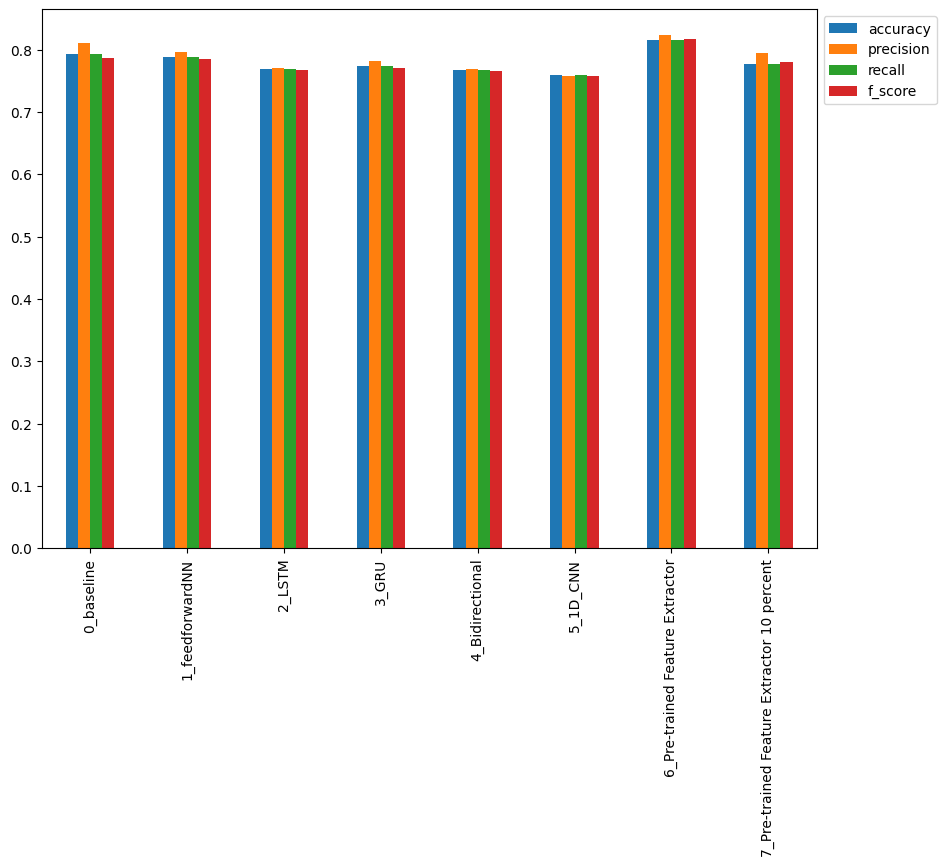

In [ ]:
# plotting the dataframe
all_model_results["accuracy"] = all_model_results["accuracy"]/100 

all_model_results.plot(kind = 'bar',figsize=(10,7)).legend(bbox_to_anchor=(1.0, 1.0))

<Axes: >

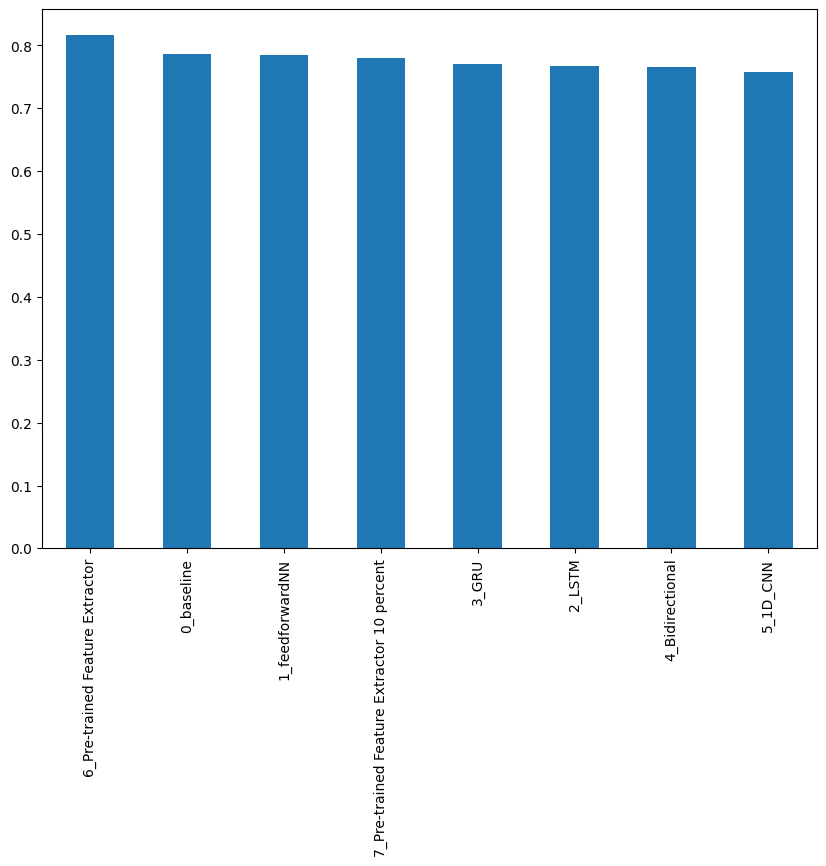

In [ ]:
# plotting only the f1 score:
all_model_results.sort_values("f_score", ascending = False)["f_score"].plot(kind = 'bar',figsize=(10,7))

###Comparing models using tensorboard

In [ ]:
!pip install -U tensorboard

In [ ]:
!tensorboard dev upload --logdir model_logs \
  --name "NLP modelling experiments" \
  --description "A series of different NLP modellings experiments with various models" \
  --one_shot

In [ ]:
!tensorboard dev delete --experiment_id WX8Ap4U0QN21gdFXMU8YbA

###Saving & Loading our Models:

**1- with HDF5 format**

In [ ]:
model_6.save("model_6.h5")

In [ ]:
# load and evaluate the model:
loaded_h5_model_6 = tf.keras.models.load_model("model_6.h5",
                                        custom_objects={"KerasLayer":hub.KerasLayer})

In [ ]:
loaded_h5_model_6.evaluate(val_sentences,val_labels)

24/24 [==============================] - 1s 18ms/step - loss: 0.4291 - accuracy: 0.8150


[0.4291127622127533, 0.8149606585502625]

**2- with 'SavedModel' format**

In [ ]:
model_6.save("model_6_saved_model")

In [ ]:
# Downloading the model to our device:
from google.colab import files
files.download('/content/model_6_saved_model')

In [ ]:
# loading our model and evaluating it:
loaded_model_6_saved_model_format = tf.keras.models.load_model("model_6_saved_model")

In [ ]:
loaded_model_6_saved_model_format.evaluate(val_sentences,val_labels)

24/24 [==============================] - 1s 18ms/step - loss: 0.4291 - accuracy: 0.8150


[0.4291127622127533, 0.8149606585502625]

###Finding the most wrong Predictions:

In [ ]:
#Creating a DataFrame with validation sentences and best performing predictions
val_df = pd.DataFrame({"text":val_sentences,
                       "target":val_labels,
                       "prediction":model_6_preds,
                       "pred_prob":tf.squeeze(model_6_pred_probs)})

val_df

,text,target,prediction,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.202389
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.779899
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.985717
3,@camilacabello97 Internally and externally scr...,1,0.0,0.218175
4,Radiation emergency #preparedness starts with ...,1,1.0,0.718841
...,...,...,...,...
757,That's the ultimate road to destruction,0,0.0,0.101822
758,@SetZorah dad why dont you claim me that mean ...,0,0.0,0.084624
759,FedEx will no longer transport bioterror patho...,0,1.0,0.887569
760,Crack in the path where I wiped out this morni...,0,1.0,0.641231


In [ ]:
# getting the data where the target is not equal to the model's prediction, and
# sort them according to the pred_prob in descending order:

most_wrong = val_df[val_df["target"] != val_df["prediction"]].sort_values("pred_prob", ascending=False)

In [ ]:
most_wrong[:10]  # where false positives exist

,text,target,prediction,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.909192
759,FedEx will no longer transport bioterror patho...,0,1.0,0.887569
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.853197
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.837505
628,@noah_anyname That's where the concentration c...,0,1.0,0.824138
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.816806
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.806909
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.795963
119,@freefromwolves GodsLove &amp; #thankU brother...,0,1.0,0.793998
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.779899


In [ ]:
most_wrong.tail(10) # false negatives

,text,target,prediction,pred_prob
408,@willienelson We need help! Horses will die!Pl...,1,0.0,0.053412
536,@DavidVonderhaar At least you were sincere ??,1,0.0,0.048966
221,going to redo my nails and watch behind the sc...,1,0.0,0.048853
681,'The way you move is like a full on rainstorm ...,1,0.0,0.047832
59,You can never escape me. Bullets don't harm me...,1,0.0,0.043521
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.036739
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.034884
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.033928
233,I get to smoke my shit in peace,1,0.0,0.033383
38,Why are you deluged with low self-image? Take ...,1,0.0,0.032077


###Making predictions on the test dataset:

In [ ]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [ ]:
test_sentences = test_df["text"].to_list()

In [ ]:
test_predictions = model_6.predict(test_sentences)

test_predictions[:10]

102/102 [==============================] - 2s 17ms/step


array([[0.5250457 ],
       [0.8577414 ],
       [0.8029186 ],
       [0.9354992 ],
       [0.96225655],
       [0.54019195],
       [0.05261634],
       [0.03711497],
       [0.04540396],
       [0.04589288]], dtype=float32)

In [ ]:
test_pred_probs = tf.squeeze(tf.round(test_predictions))

test_pred_probs[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 1., 1., 1., 0., 0., 0., 0.], dtype=float32)>

In [ ]:
test_predictions_df = pd.DataFrame({"text":test_sentences,
                                    "prediction":test_pred_probs})

test_predictions_df

,text,prediction
0,Just happened a terrible car crash,1.0
1,"Heard about #earthquake is different cities, s...",1.0
2,"there is a forest fire at spot pond, geese are...",1.0
3,Apocalypse lighting. #Spokane #wildfires,1.0
4,Typhoon Soudelor kills 28 in China and Taiwan,1.0
...,...,...
3258,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,1.0
3259,Storm in RI worse than last hurricane. My city...,1.0
3260,Green Line derailment in Chicago http://t.co/U...,1.0
3261,MEG issues Hazardous Weather Outlook (HWO) htt...,1.0


In [ ]:
test_predictions_df[test_predictions_df["prediction"] == 0.0]

,text,prediction
6,They'd probably still show more life than Arse...,0.0
7,Hey! How are you?,0.0
8,What a nice hat?,0.0
9,Fuck off!,0.0
10,No I don't like cold!,0.0
...,...,...
3248,Smackdown tyme this should put me in a good mo...,0.0
3249,@thrillhho jsyk I haven't stopped thinking abt...,0.0
3250,@stighefootball Begovic has been garbage. He g...,0.0
3251,Wrecked today got my hattrick ????,0.0


In [ ]:
test_samples = test_predictions_df.sample(10)

test_samples

,text,prediction
684,Emergency crews are on the scene of a chemical...,1.0
465,Hot Ladies Handbag Leather Shoulder Tote Satch...,0.0
3014,Today we played mini golf in the rain I was ca...,0.0
2392,Guess who's got a hilarious new piece on @Raze...,0.0
3168,As California fires rage the Forest Service so...,1.0
3101,I think it's time for a cup of tea and a scone...,0.0
2565,@simplyysacred dude like he screams his soul out,0.0
450,I remember the halo interview with ABC. Wasn't...,0.0
2544,@CokeBoys__ yo best I screamed when I watched ...,0.0
1882,video says #ISIS Threatens To Kill Croatian Ho...,1.0


###Predicting on Tweets from the wild

In [ ]:
def predict_on_sentence(model, sentence):
  pred = model.predict([sentence])
  pred_prob = tf.squeeze(tf.round(pred))
  print(f"Tweet:\n {sentence}\n is a ","Disaster" if pred_prob == 1 else "not a disaster")


In [ ]:
# Turn Tweet into string
daniels_tweet = "Life like an ensemble: take the best choices from others and make your own"

In [ ]:
predict_on_sentence(model_6, daniels_tweet)

1/1 [==============================] - 0s 45ms/step
Tweet:
 Life like an ensemble: take the best choices from others and make your own
 is a  not a disaster


###The speed/score tradeoff

In [ ]:
# define a function that calculates time per prediction of a model
import time
def pred_timer(model, samples):
  start_time = time.perf_counter()
  pred = model.predict([samples])
  end_time = time.perf_counter()

  total_time = end_time - start_time

  return total_time, total_time/len(samples)

In [ ]:
# the time that model_6(TF Hub pre-trained model) takes:

model_6_total_pred_time, model_6_time_per_pred = pred_timer(model_6, val_sentences)
model_6_total_pred_time, model_6_time_per_pred

24/24 [==============================] - 0s 15ms/step


(0.6989213409997319, 0.0009172196076111968)

In [ ]:
# the time that the baseline takes:
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
baseline_total_pred_time, baseline_time_per_pred

AttributeError: ignored

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_results["f1"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-Score");